In [1]:
import pandas as pd
import feature_selector

In [2]:
df = pd.read_csv("../dataset/features/data.csv")

In [3]:
df.head()

,Unnamed: 0,ID,Label,1,2,3,4,5,6,7,...,223451,223452,223453,223454,223455,223456,223457,223458,223459,223460
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_labels = df['Label']
# delete first unnamed column and ID, Label columns
train = df.iloc[:,3:]

In [5]:
train

,1,2,3,4,5,6,7,8,9,10,...,223451,223452,223453,223454,223455,223456,223457,223458,223459,223460
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
318,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fs = feature_selector.FeatureSelector(data = train, labels = train_labels)

#### Alternative Option for Using all Methods

In [7]:
# fs.identify_all(selection_params = {'missing_threshold': 0.6,'correlation_threshold': 0.98, 'task': 'classification', 'eval_metric': 'auc', 
#                                      'cumulative_importance': 0.99})

#### 1. Missing values

In [7]:
fs.identify_missing(missing_threshold=0.6)

0 features with greater than 0.60 missing values.



In [8]:
missing_features = fs.ops['missing']
missing_features[:10]

[]

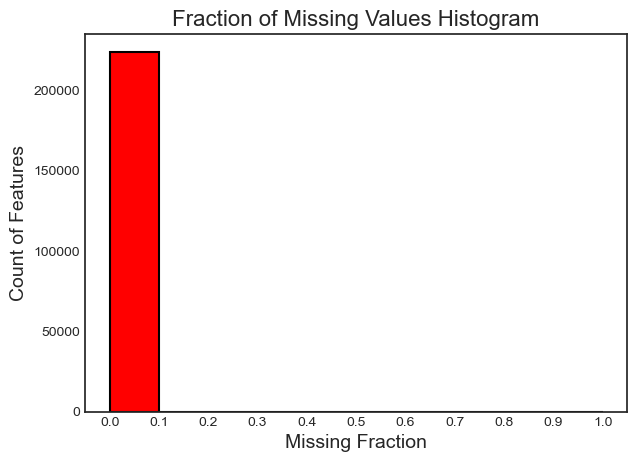

In [9]:
fs.plot_missing()

#### 2. Single Unique Value

In [10]:
fs.identify_single_unique()

1 features with a single unique value.



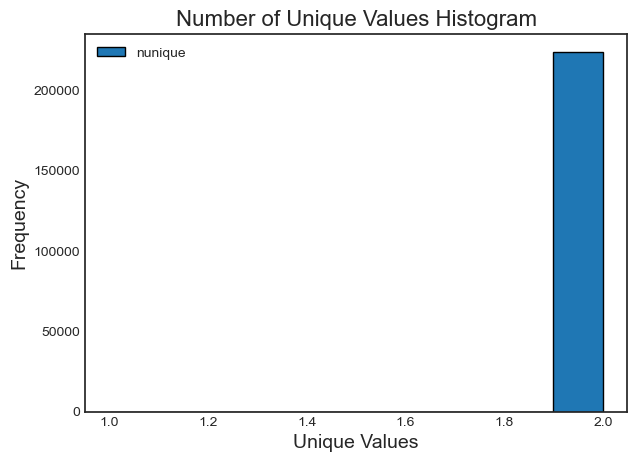

In [11]:
single_unique = fs.ops['single_unique']
fs.plot_unique()

In [12]:
fs.unique_stats.sample(5)

,nunique
207705,2
93672,2
191471,2
162859,2
187148,2


#### 3. Collinear (highly correlated) Features


In [14]:
# fs.identify_collinear(correlation_threshold=0.975)

In [15]:
# correlated_features = fs.ops['collinear']
# correlated_features[:5]

In [16]:
# fd.plot_collinear()

In [17]:
# fs.identify_collinear(correlation_threshold=0.98)
# fs.plot_collinear()

#### 4. Zero Importance Features

In [13]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[268]	valid_0's auc: 0.987374	valid_0's binary_logloss: 0.170103
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.991582	valid_0's binary_logloss: 0.251424
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.991582	valid_0's binary_logloss: 0.198256
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[111]	valid_0's auc: 0.98064	valid_0's binary_logloss: 0.140172
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.936027	valid_0's binary_logloss: 0.34488
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.984848	valid_0's binary_logloss: 0.237137


In [14]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 223460 original features
There are 0 one-hot features


In [15]:
fs.data_all.head(10)

,1,2,3,4,5,6,7,8,9,10,...,223451,223452,223453,223454,223455,223456,223457,223458,223459,223460
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features

['148498',
 '149046',
 '148999',
 '149047',
 '149052',
 '149007',
 '148994',
 '149006',
 '149055',
 '149048',
 '148497',
 '149054',
 '149005',
 '149051',
 '148998',
 '149004',
 '148499',
 '149053',
 '148996',
 '149049',
 '149050',
 '148997',
 '149003',
 '149002',
 '148500',
 '149000',
 '149008',
 '149001',
 '148995',
 '149011',
 '149009',
 '149045',
 '149021',
 '148501',
 '149023',
 '149024',
 '149038',
 '149025',
 '149037',
 '149036',
 '149026',
 '149027',
 '149028',
 '149035',
 '149034',
 '149029',
 '149033',
 '149030',
 '149031',
 '149039',
 '149040',
 '149020',
 '149014',
 '149010',
 '149032',
 '149012',
 '149044',
 '149013',
 '149043',
 '148496',
 '149015',
 '149019',
 '149016',
 '148494',
 '149042',
 '149017',
 '149041',
 '148495',
 '149018',
 '149022',
 '148977',
 '148993',
 '148926',
 '148928',
 '148929',
 '148930',
 '148931',
 '148932',
 '148933',
 '148934',
 '148935',
 '148936',
 '148937',
 '148938',
 '148939',
 '148940',
 '148941',
 '148507',
 '148942',
 '148943',
 '148944',

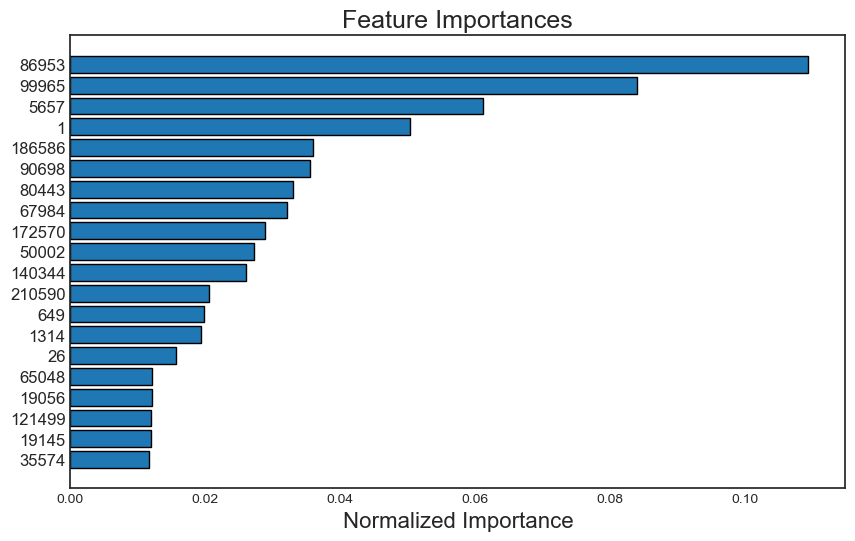

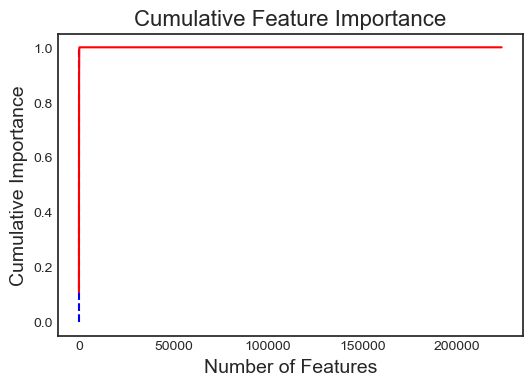

157 features required for 0.99 of cumulative importance


In [24]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 20)

In [18]:
fs.feature_importances.head(30)

,feature,importance,normalized_importance,cumulative_importance
0,86953,76.2,0.109420,0.109420
1,99965,58.5,0.084003,0.193423
2,5657,42.6,0.061172,0.254595
3,1,35.1,0.050402,0.304997
4,186586,25.0,0.035899,0.340896
5,90698,24.7,0.035468,0.376364
6,80443,23.0,0.033027,0.409391
7,67984,22.4,0.032165,0.441557
8,172570,20.1,0.028863,0.470419
9,50002,19.0,0.027283,0.497702


In [58]:
print(type(fs.feature_importances))
fs.feature_importances[fs.feature_importances['importance']>0]

<class 'pandas.core.frame.DataFrame'>


,feature,importance,normalized_importance,cumulative_importance
0,86953,76.2,0.109420,0.109420
1,99965,58.5,0.084003,0.193423
2,5657,42.6,0.061172,0.254595
3,1,35.1,0.050402,0.304997
4,186586,25.0,0.035899,0.340896
...,...,...,...,...
198,158359,0.1,0.000144,0.999426
199,19033,0.1,0.000144,0.999569
200,19099,0.1,0.000144,0.999713
201,174613,0.1,0.000144,0.999856


#### 5. Low Importance Features

In [25]:
fs.identify_low_importance(cumulative_importance = 0.99)

156 features required for cumulative importance of 0.99 after one hot encoding.
223304 features do not contribute to cumulative importance of 0.99.



In [26]:
fs.identify_low_importance(cumulative_importance = 0.98)

135 features required for cumulative importance of 0.98 after one hot encoding.
223325 features do not contribute to cumulative importance of 0.98.



In [28]:
low_importance_features = fs.ops['low_importance']
low_importance_features

['19090',
 '905',
 '121375',
 '129013',
 '115199',
 '36224',
 '19211',
 '62637',
 '601',
 '543',
 '156226',
 '24707',
 '222471',
 '19199',
 '141224',
 '73599',
 '19236',
 '150336',
 '19242',
 '185147',
 '19059',
 '128444',
 '127854',
 '168024',
 '13633',
 '19104',
 '188066',
 '43440',
 '193706',
 '19272',
 '19070',
 '155951',
 '190520',
 '137221',
 '19049',
 '184348',
 '19241',
 '62',
 '99274',
 '19064',
 '137205',
 '191908',
 '19259',
 '217152',
 '46752',
 '66347',
 '99099',
 '181103',
 '37331',
 '19137',
 '19134',
 '217',
 '77362',
 '19240',
 '185481',
 '60639',
 '145226',
 '19130',
 '19143',
 '126',
 '210244',
 '19197',
 '136442',
 '158359',
 '19033',
 '19099',
 '174613',
 '149046',
 '148999',
 '149047',
 '149052',
 '149007',
 '148994',
 '149006',
 '149055',
 '149048',
 '148497',
 '148499',
 '149053',
 '149051',
 '148998',
 '149004',
 '61697',
 '148498',
 '148996',
 '149049',
 '149050',
 '148997',
 '149002',
 '149003',
 '149005',
 '149054',
 '149009',
 '148500',
 '148995',
 '149040'

# Removing Features

In [29]:
train_no_missing = fs.remove(methods = ['missing'])

Removed 0 features.


In [30]:
train_no_missing_zero = fs.remove(methods = ['missing', 'zero_importance'])

Removed 223257 features.


In [31]:
all_to_remove = fs.check_removal()

Total of 223325 features identified for removal


In [32]:
train_removed = fs.remove(methods = 'all')

['missing', 'single_unique', 'zero_importance', 'low_importance'] methods have been run

Removed 223325 features.


In [33]:
train_removed

,1,3,21,26,48,580,649,936,1078,1314,...,204087,206876,207104,208322,209949,210590,212641,214127,219283,222263
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,1,0,0,1,1,0,1,0,...,1,1,1,0,0,0,1,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
317,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
318,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
319,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [38]:
train_removed.values
# save to x array
import numpy as np

np.savetxt('../dataset/matrix/X_fs.csv',  train_removed.values)

In [39]:
train_labels.values
np.savetxt('../dataset/matrix/Y_fs.csv',  train_labels.values)